## Un ejemplo de ecuaciones de Reacción-difusión

### Curso de Cálculo diferencial e Integral IV

#### Sergio Nieto, Facultad de Ciencias, UNAM

25 de mayo, 2018

![alt text](pattern.PNG "Title")

Las ecuaciones que vamos a resolver son las siguientes:

\begin{equation}
\frac{\partial u}{\partial t} = a \nabla^2 u + u - u^3 - v + k \\
\frac{\partial v}{\partial t} = b \nabla^2 v + u - v \\
\end{equation}

Los parámetros $a,b$ son los coeficientes de difusión. Cuando son cero, lo que tenemos el el sistema de ecuaciones diferenciales ordinarias conocido como sistema de FitzHugh-Nagumo. 

En este problema, la variable $u$ representa la concentración de una substancia que favorece la creación de un pigmento en la piel y la segunda $v$ es un inhibidor de la formación del pigmento.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Vamos a fijar los parámetros de las ecuaciones y los pasos de la discretización:

In [2]:
a = 2.8e-4
b= 5e-3
tau =.1
k=-.005
paso = 100 #tamaño de la malla
dx = 2. / paso
T= 6.0
dt= .001
n = int(T/dt)

In [3]:
U = np.random.rand(size,size)
V = np.random.rand(size,size)
for i in range(0,100):
    U[i]=np.cos(30*(np.linspace(-1,1,100)**2)*(np.linspace(-1,1,100)[i])) #La condición inicial

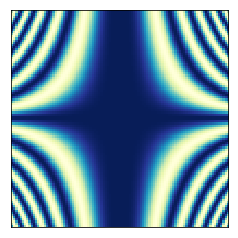

In [11]:
plt.imshow(U, cmap=plt.cm.YlGnBu, extent=[-1,1,-1,1]);
plt.xticks([]); plt.yticks([]); 

In [12]:
def laplacian(Z):
    Ztapa = Z[0:-2, 1:-1]
    Zladoizq = Z[1:-1, 0:-2]
    Zbase = Z[2:, 1:-1]
    Zladoder = Z[1:-1, 2:]
    Zcentro = Z[1:-1, 1:-1]
    return (Ztapa + Zladoizq + Zbase + Zladoder - 4 * Zcentro) / dx**2 

Lo anterior es una expresión para el laplaciano, que contiene segundas derivadas, en donde *Ztop* es igual a $u(x, y + h)$, etc.

La expresión completa es la forma vectorizada de:

\begin{equation}
\nabla^2 u(x,y) = \frac{u(x + h,y) + u(x - h, y) + u(x, y + h) + u(x, y - h) - 4 u(x, y)}{dx^2}
\end{equation}

Usando diferencias finitas:

In [13]:
for i in range(n):
    #Primero se calculan los laplacianos
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # Los valores iniciales de las variables se toman dentro de la malla
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    # Se actualizan las vaiables en paso siguiente según el lado derecho de las ecuaciones
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k),\
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Las siguientes expresiones representanlas condiciones de Neumann, las derivadas espaciales se anulan.
    for x in (U, V):
        x[0, :] = x[1, :]
        x[-1, :] = x[-2, :]
        x[:, 0] = x[:, 1]
        x[:, -1] = x[:, -2]

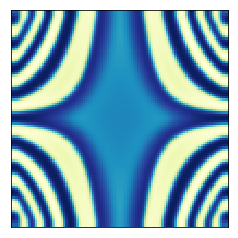

In [15]:
plt.imshow(U, cmap=plt.cm.YlGnBu, extent=[-1,1,-1,1]);
plt.xticks([]); plt.yticks([]);

Ahora vamos a ir aumentando poco a poco el tiempo total para ver cómo se va formando un patrón nuevo:

In [16]:
T=7.0

In [17]:
n = int(T/dt)

In [18]:
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    # We update the variables.
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k),\
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

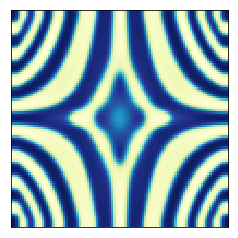

In [19]:
plt.imshow(U, cmap=plt.cm.YlGnBu, extent=[-1,1,-1,1]);
plt.xticks([]); plt.yticks([]);

In [20]:
T=8.0
n = int(T/dt)
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    # We update the variables.
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k),\
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

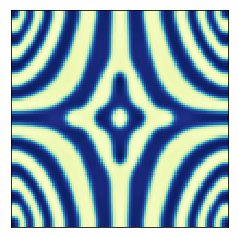

In [22]:
plt.imshow(U, cmap=plt.cm.YlGnBu, extent=[-2,2,-2,2]);
plt.xticks([]); plt.yticks([]);

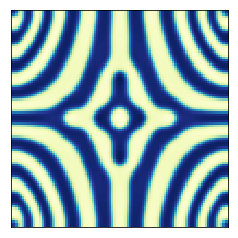

In [23]:
T=10.0
n = int(T/dt)
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    # We update the variables.
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k),\
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

plt.imshow(U, cmap=plt.cm.YlGnBu, extent=[-1,1,-1,1]);
plt.xticks([]); plt.yticks([]);

Cambiemos la condición inicial por un *seno* para ver cómo varía la formación de patrones:

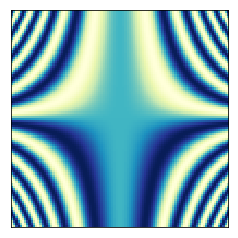

In [24]:
U = np.random.rand(size,size)
V = np.random.rand(size,size)
for i in range(0,100):
    U[i]=np.sin(30*(np.linspace(-1,1,100)**2)*(np.linspace(-1,1,100)[i]))
    
plt.imshow(U, cmap=plt.cm.YlGnBu, extent=[-1,1,-1,1]);
plt.xticks([]); plt.yticks([]);

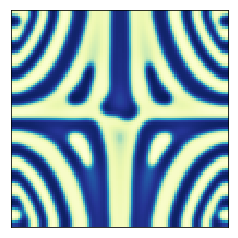

In [26]:
T=9.0
n = int(T/dt)
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    # We update the variables.
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k),\
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]
        
plt.imshow(U, cmap=plt.cm.YlGnBu, extent=[-1,1,-1,1]);
plt.xticks([]); plt.yticks([]);

In [29]:
T=15.0
n = int(T/dt)
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    # We update the variables.
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k),\
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

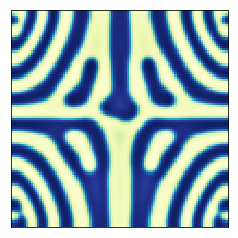

In [31]:
plt.imshow(U, cmap=plt.cm.YlGnBu, extent=[-3,3,-3,3]);
plt.xticks([]); plt.yticks([]);

Ahora pongmos una condición inicial con más líneas definidas, pero que afectará de manera diferente el resultado:

In [32]:
U = np.random.rand(size,size)
V = np.random.rand(size,size)
for i in range(0,100):
    U[i]=np.cos(30*(np.linspace(-1,1,100))*(np.linspace(-1,1,100)[i])) * np.sin(30*(np.linspace(-1,1,100)**2)*(np.linspace(-1,1,100)[i]))

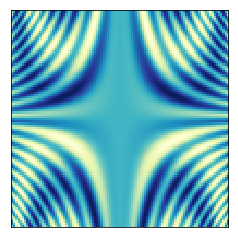

In [33]:
plt.imshow(U, cmap=plt.cm.YlGnBu, extent=[-1,1,-1,1]);
plt.xticks([]); plt.yticks([]);

In [34]:
T=9.0
n = int(T/dt)
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    # We update the variables.
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k),\
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

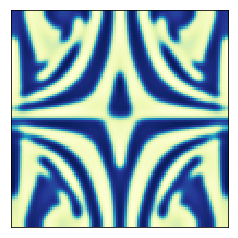

In [36]:
plt.imshow(U, cmap=plt.cm.YlGnBu, extent=[-1,1,-1,1]);
plt.xticks([]); plt.yticks([]);

In [37]:
T=15.0
n = int(T/dt)
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    # We update the variables.
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k),\
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

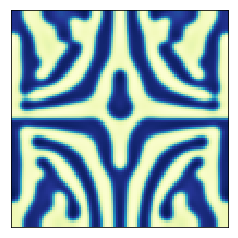

In [38]:
plt.imshow(U, cmap=plt.cm.YlGnBu, extent=[-1,1,-1,1]);
plt.xticks([]); plt.yticks([]);

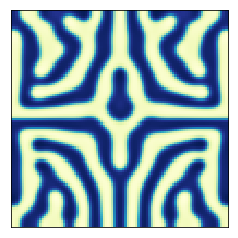

In [39]:
T=25.0
n = int(T/dt)
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    # We update the variables.
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k),\
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]
        
plt.imshow(U, cmap=plt.cm.YlGnBu, extent=[-1,1,-1,1]);
plt.xticks([]); plt.yticks([]);

Esto es un refrito de la siguiente referencia:

https://github.com/ipython-books/cookbook-2nd-code/blob/master/chapter12_deterministic/04_turing.ipynb

El código quehemos usado lo obtuvimos de ahí y solo lo modificamos para mostrar algunas características extra. Pueden consultar la referencia para profundizar más en el código y encontrar más referencias.